<div style="text-align:center">
    <font color='#e06377'>
        <h1>BARBIE MOVIE - SENTIMENT ANALYSIS</h1>
    </font>
</div>

<div style="text-align:center">
    <img src="Barbie.jpg" alt="Barbie" width=400 height=200 >
</div>

In [1]:
#importing necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

#packages for sentiment analysis
import nltk
import ssl
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
from textblob import TextBlob
from flair.models import TextClassifier
from flair.data import Sentence
from wordcloud import WordCloud, STOPWORDS

## <font color='#e06377'>Importing the Dataset</font>

In [2]:
df = pd.read_csv("C:/Users/Harshita/Desktop/Datasets/BARBIE DATA SET.csv")

In [3]:
df.head(10)

,Rating,Review
0,6.0,Creative but preachy and confusingI'm just goi...
1,6.0,"Beautiful film, but so preachyMargot does the ..."
2,6.0,"High Highs, Low Lows.The first thing you need ..."
3,10.0,"As a guy I felt some discomfort, and that's ok..."
4,9.0,"A Technicolor DreamWow, this movie was a love ..."
5,6.0,Clever and fun beginning turns into another le...
6,8.0,Well this really did come as a surprise.It pai...
7,8.0,Barbie Is A Weirdly Fun Movie!While i'm not so...
8,8.0,Fun and surprisingly touchingI was honestly do...
9,10.0,Ken out of tenWow. I did not see this masterpi...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rating  678 non-null    float64
 1   Review  683 non-null    object 
dtypes: float64(1), object(1)
memory usage: 10.8+ KB


In [5]:
df.shape

(683, 2)

## <font color='#e06377'>Data Preprocessing</font>

In [6]:
df.isnull().sum()

Rating    5
Review    0
dtype: int64

In [7]:
df['Rating'].fillna(df['Rating'].mode()[0], inplace = True)

In [8]:
df.isnull().sum()

Rating    0
Review    0
dtype: int64

In [9]:
dup=df.duplicated()
print(df[dup])
#NO duplicates

Empty DataFrame
Columns: [Rating, Review]
Index: []


#### <font color='#e06377'>There are no duplicate reviews.</font>

## <font color='#e06377'>Exploratory Data Analysis</font>

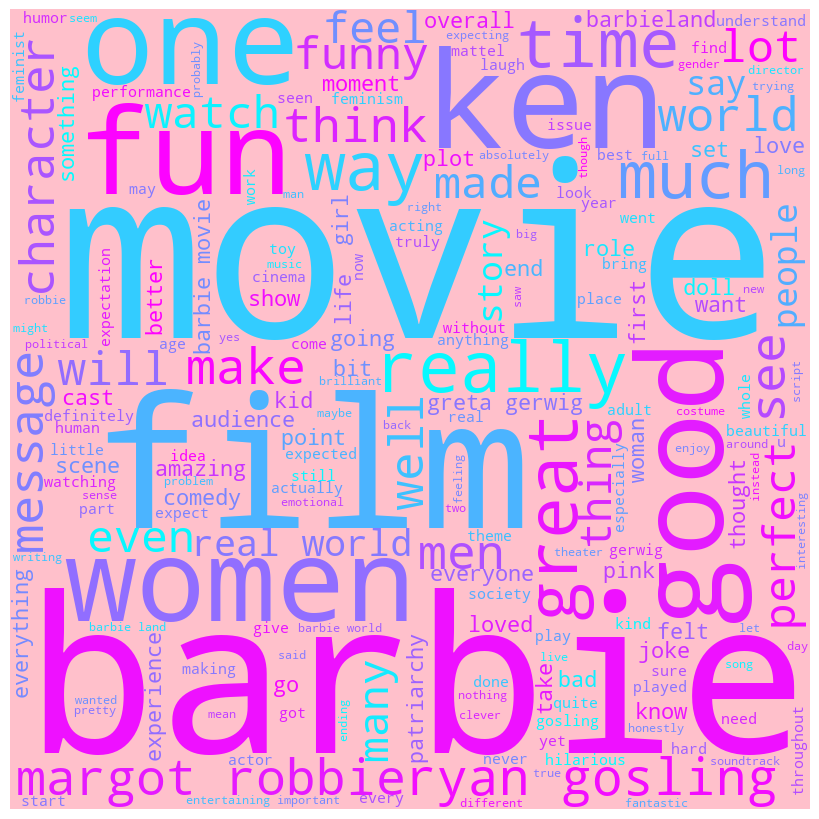

In [10]:
comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df.Review:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "
color_map = 'cool'
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='pink',colormap=color_map,
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

#plotting the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

#### <font color='#e06377'>The word cloud analysis indicates that the name "Ken" has been prominently mentioned and is considered an integral part of the movie. The audience seems to appreciate and praise the contribution of "Ken" to the film. The word cloud visually represents the frequency and importance of words in the text data, with "Ken" standing out as a significant and well-regarded element in the movie, according to audience sentiment.</font>

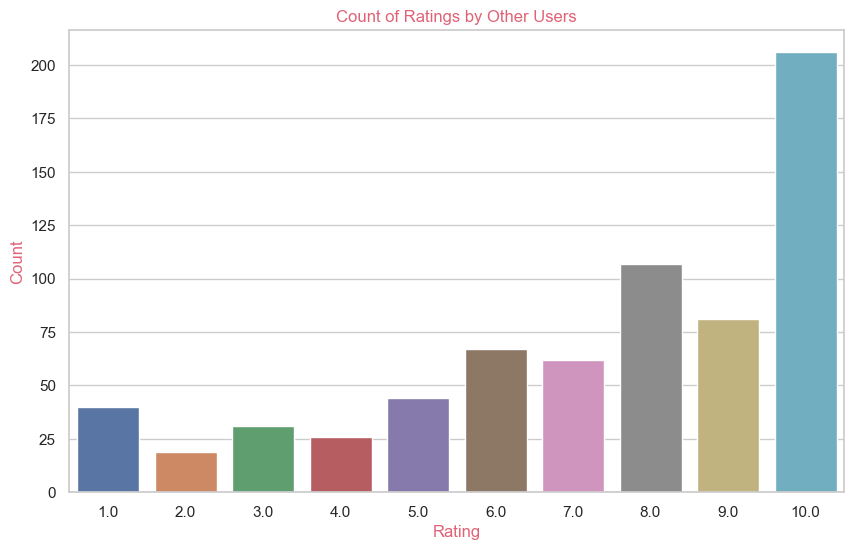

In [11]:
# Set the style for the plot (optional but can improve visual appeal)
sns.set(style = "whitegrid")

# Create the count plot
plt.figure(figsize = (10, 6))  # Adjust the figure size as needed
sns.countplot(data = df, x = 'Rating')

# Add labels and title
plt.xlabel('Rating',color='#e06377')
plt.ylabel('Count',color='#e06377')
plt.title('Count of Ratings by Other Users',color='#e06377')

# Display the plot
plt.show()

#### <font color='#e06377'>It can be observed that reviews with rating as 10 are highest. The movie has overall good rating.</font>


## <font color='#e06377'>Setup for SentimentIntensityAnalyzer()</font>

In [12]:
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [13]:
sia = SentimentIntensityAnalyzer()

In [14]:
example=df["Review"][8]
sia.polarity_scores(example)

{'neg': 0.021, 'neu': 0.614, 'pos': 0.364, 'compound': 0.9972}

In [15]:
compound_scores = []
positive_scores = []
negative_scores = []
neutral_scores = []

# Iterate through the DataFrame and calculate polarity scores
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Review']
    scores = sia.polarity_scores(text)
    compound_scores.append(scores['compound'])
    positive_scores.append(scores['pos'])
    negative_scores.append(scores['neg'])
    neutral_scores.append(scores['neu'])

df['V_Compound_Score'] = compound_scores
df['V_Positive_Score'] = positive_scores
df['V_Negative_Score'] = negative_scores
df['V_Neutral_Score'] = neutral_scores

  0%|          | 0/683 [00:00<?, ?it/s]

In [16]:
df['Review'][4]

"A Technicolor DreamWow, this movie was a love letter to cinema. From the Kubrick reference at the opening, to the soundstage being 100% real - no cgi for the sets. There were dance sequences like in the olden days (think Grease) and the costuming , wow the costuming. Greta Gerwig dug deep to make this masterpiece using all of her technical chops along the way. The casting director also nailed it, everyone was wonderful.The acting was perfection, I loved seeing the variety of Barbie's on screen and there were so many jokes that would be appropriate for all audiences, this has to be a voluntary PG13 rating as there wasn't swearing or nudity. There was one beach fight amongst the Kens but that's not really violence compared to today's average films, no one was harmed nor any fake blood used.I actually didn't like the ending at all, and I was quite annoyed that Rhea Perlman played the creator of Barbie but made two quips about the IRS getting her for tax evasion - something Ruth Handler n

In [17]:
df.head(4)

,Rating,Review,V_Compound_Score,V_Positive_Score,V_Negative_Score,V_Neutral_Score
0,6.0,Creative but preachy and confusingI'm just goi...,0.9893,0.239,0.123,0.638
1,6.0,"Beautiful film, but so preachyMargot does the ...",0.9637,0.220,0.121,0.659
2,6.0,"High Highs, Low Lows.The first thing you need ...",0.9964,0.181,0.062,0.757
3,10.0,"As a guy I felt some discomfort, and that's ok...",0.9891,0.189,0.067,0.744


## <font color='#e06377'>TextBlob Model</font>

In [18]:
textblob_scores = []

for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Review']
    blob = TextBlob(text)
    textblob_scores.append(blob.sentiment.polarity)

df['TextBlob_Score'] = textblob_scores

  0%|          | 0/683 [00:00<?, ?it/s]

In [19]:
df.head()

,Rating,Review,V_Compound_Score,V_Positive_Score,V_Negative_Score,V_Neutral_Score,TextBlob_Score
0,6.0,Creative but preachy and confusingI'm just goi...,0.9893,0.239,0.123,0.638,0.124759
1,6.0,"Beautiful film, but so preachyMargot does the ...",0.9637,0.220,0.121,0.659,0.138651
2,6.0,"High Highs, Low Lows.The first thing you need ...",0.9964,0.181,0.062,0.757,0.193439
3,10.0,"As a guy I felt some discomfort, and that's ok...",0.9891,0.189,0.067,0.744,0.167063
4,9.0,"A Technicolor DreamWow, this movie was a love ...",0.9439,0.154,0.081,0.765,0.051824


## <font color='#e06377'>Flair Model</font>

In [20]:
#Loading the pre-trained Flair sentiment analysis model
classifier = TextClassifier.load('en-sentiment')

flair_scores = []

for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Review']
    sentence = Sentence(text)
    classifier.predict(sentence)
    flair_scores.append(sentence.labels[0].score)

df['Flair_Score'] = flair_scores

  0%|          | 0/683 [00:00<?, ?it/s]

In [21]:
df.head()

,Rating,Review,V_Compound_Score,V_Positive_Score,V_Negative_Score,V_Neutral_Score,TextBlob_Score,Flair_Score
0,6.0,Creative but preachy and confusingI'm just goi...,0.9893,0.239,0.123,0.638,0.124759,0.999992
1,6.0,"Beautiful film, but so preachyMargot does the ...",0.9637,0.220,0.121,0.659,0.138651,0.999983
2,6.0,"High Highs, Low Lows.The first thing you need ...",0.9964,0.181,0.062,0.757,0.193439,0.999080
3,10.0,"As a guy I felt some discomfort, and that's ok...",0.9891,0.189,0.067,0.744,0.167063,0.999995
4,9.0,"A Technicolor DreamWow, this movie was a love ...",0.9439,0.154,0.081,0.765,0.051824,0.999398


In [22]:
df = df.drop(columns = ['V_Positive_Score','V_Negative_Score','V_Neutral_Score', 'TextBlob_Score', 'Flair_Score'])

In [23]:
df.head()

,Rating,Review,V_Compound_Score
0,6.0,Creative but preachy and confusingI'm just goi...,0.9893
1,6.0,"Beautiful film, but so preachyMargot does the ...",0.9637
2,6.0,"High Highs, Low Lows.The first thing you need ...",0.9964
3,10.0,"As a guy I felt some discomfort, and that's ok...",0.9891
4,9.0,"A Technicolor DreamWow, this movie was a love ...",0.9439


In [24]:
#renaming the column as sentiment
df = df.rename({'V_Compound_Score':'Sentiment'},axis=1)
df

,Rating,Review,Sentiment
0,6.0,Creative but preachy and confusingI'm just goi...,0.9893
1,6.0,"Beautiful film, but so preachyMargot does the ...",0.9637
2,6.0,"High Highs, Low Lows.The first thing you need ...",0.9964
3,10.0,"As a guy I felt some discomfort, and that's ok...",0.9891
4,9.0,"A Technicolor DreamWow, this movie was a love ...",0.9439
...,...,...,...
678,5.0,Hilarious with not very well thought out femin...,0.8736
679,2.0,Waste of timeIf ur over 13 this movie will mos...,-0.6353
680,2.0,Barbie-not goodThe only reason this movie even...,0.7393
681,1.0,Not for little kids and wastes your time.Too m...,-0.5793


In [25]:
def sentiment(label):
    if label <0.5:
        return "Negative"
    elif 0.5 <= label <= 0.72:
        return "Neutral"
    elif label>0.72:
        return "Positive"
df['Sentiment'] = df['Sentiment'].apply(sentiment)

In [26]:
df.head()

,Rating,Review,Sentiment
0,6.0,Creative but preachy and confusingI'm just goi...,Positive
1,6.0,"Beautiful film, but so preachyMargot does the ...",Positive
2,6.0,"High Highs, Low Lows.The first thing you need ...",Positive
3,10.0,"As a guy I felt some discomfort, and that's ok...",Positive
4,9.0,"A Technicolor DreamWow, this movie was a love ...",Positive


In [27]:
df[df["Sentiment"] == "Neutral"]

,Rating,Review,Sentiment
21,8.0,I am KenoughSo I went into the movie with litt...,Neutral
34,10.0,Barbie is not a simple live action of a timele...,Neutral
35,5.0,More of a marketing flickThe brilliant marketi...,Neutral
41,6.0,Just a little emptyI really wanted to enjoy th...,Neutral
74,4.0,Way too preachyMy wife and I did the double fe...,Neutral
169,7.0,"It is, indeed, a Barbie worldGranted, my exper...",Neutral
272,6.0,The Lego Movie but for femalesNow please take ...,Neutral
340,1.0,BADI am just amazed how many good actors and a...,Neutral
383,10.0,what an amazing movieMore could you want from ...,Neutral
489,3.0,"Wonderfull setup, with a not so wonderfully ex...",Neutral


In [28]:
df["Review"][682]

'Feminism but the rest?I\'m NOT a Barbie girl in NOT the Barbie World, Life in plastic, It\'s NOT fantastic. In the beginning of the film, it can be thought that will go nice way with a good end and a powerful message. There is so much effort in the beginning, like building a strong idea, however this is disappered in the final. And this is such a disappointment that the film does nothing about giving an idea about liberal feminism because there is always managers as boys or girls. I think the film\'s main idea should be every human being no matter it is a boy or a girl can be everything they want and can be handle every situation as a human. It is ridiculous to discuss this as "being a man or a woman" in the 2023. In the Barbie world or in the real world it should be out of date. The final should be reviewed with this manner cause the expactation was very high with this huge-budget film...'

#### <font color='#e06377'>Vander model works pretty well,most of the sentiments have accurate results except few.</font>

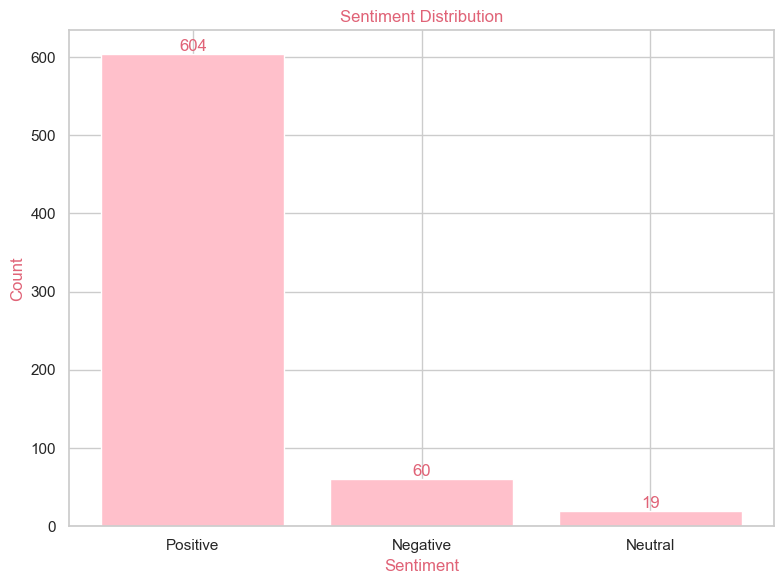

In [29]:
value_counts = df['Sentiment'].value_counts()

plt.figure(figsize=(8, 6))
bars = plt.bar(value_counts.index, value_counts.values, color='pink')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom',color = '#e06377')

plt.xlabel('Sentiment',color = '#e06377')
plt.ylabel('Count',color = '#e06377')
plt.title('Sentiment Distribution',color = '#e06377')
plt.xticks(rotation = 0)

plt.tight_layout()
plt.show()

### <font color='#e06377'>Hence, most reviews are positive for the barbie movie.</font>